## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from faker import Faker
import random
np.random.seed()
import warnings
warnings.filterwarnings("ignore")

## Create Dataset

In [3]:
x = []
palindromes = []
for i in range(1024):
    binary_string = format(i, '010b')
    x.append(binary_string)
    if binary_string == binary_string[::-1]:
        palindromes.append(binary_string)
x = np.array(x)
palindromes = np.array(palindromes)


In [4]:
print(len(palindromes))
palindromes

32


array(['0000000000', '0000110000', '0001001000', '0001111000',
       '0010000100', '0010110100', '0011001100', '0011111100',
       '0100000010', '0100110010', '0101001010', '0101111010',
       '0110000110', '0110110110', '0111001110', '0111111110',
       '1000000001', '1000110001', '1001001001', '1001111001',
       '1010000101', '1010110101', '1011001101', '1011111101',
       '1100000011', '1100110011', '1101001011', '1101111011',
       '1110000111', '1110110111', '1111001111', '1111111111'],
      dtype='<U10')

In [5]:
np.random.shuffle(palindromes)
print(len(palindromes))
palindromes

32


array(['0101001010', '1111001111', '1110000111', '1100000011',
       '0000110000', '0000000000', '0111001110', '1001111001',
       '0001001000', '1001001001', '0110110110', '0101111010',
       '1000110001', '1011111101', '0111111110', '1010110101',
       '0011111100', '0011001100', '1100110011', '0100110010',
       '1101111011', '1011001101', '0001111000', '1010000101',
       '0100000010', '0010110100', '0010000100', '0110000110',
       '1101001011', '1000000001', '1111111111', '1110110111'],
      dtype='<U10')

In [6]:
# for i in range(5):
#     x = np.concatenate((x, palindromes))
print(len(x))

1024


In [7]:
y = []
for binary_string in x:
    y.append(binary_string == binary_string[::-1])
y = np.array(y)
permutation_index = np.random.permutation(len(x))
x = x[permutation_index]
y = y[permutation_index]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def relu(x):
    return np.maximum(0, x)

In [9]:
# a = np.array([1, 2, -3])
# b = np.array([2, 3, 4])
# a*b

# Without Batches(Not needed)

In [25]:
np.random.seed(10)
LEARNING_RATE = 1e-3
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1

weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ho = np.random.rand(hidden_layer_size, output_size)
bias_ih = np.random.rand(1, hidden_layer_size)
bias_ho = np.random.rand(1, output_size)

In [26]:
weights_ih

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071],
       [0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607],
       [0.91777412, 0.71457578]])

Epoch 0 : loss [85.94902944]
Epoch 1 : loss [53.26866914]
Epoch 2 : loss [49.66599335]
Epoch 3 : loss [48.18129952]
Epoch 4 : loss [47.44014732]
Epoch 5 : loss [47.038796]
Epoch 6 : loss [46.8124563]
Epoch 7 : loss [46.68207067]
Epoch 8 : loss [46.60614386]
Epoch 9 : loss [46.56173275]
Epoch 10 : loss [46.53575933]
Epoch 11 : loss [46.52063496]
Epoch 12 : loss [46.51191099]
Epoch 13 : loss [46.5069647]
Epoch 14 : loss [46.50424555]
Epoch 15 : loss [46.50283599]
Epoch 16 : loss [46.50219324]
Epoch 17 : loss [46.50199669]
Epoch 18 : loss [46.50205742]
Epoch 19 : loss [46.50226447]
Epoch 20 : loss [46.50255304]
Epoch 21 : loss [46.50288552]
Epoch 22 : loss [46.50324027]
Epoch 23 : loss [46.50360505]
Epoch 24 : loss [46.50397304]
Epoch 25 : loss [46.50434058]
Epoch 26 : loss [46.50470579]
Epoch 27 : loss [46.50506779]
Epoch 28 : loss [46.50542627]
Epoch 29 : loss [46.50578119]
Epoch 30 : loss [46.50613267]
Epoch 31 : loss [46.50648086]
Epoch 32 : loss [46.50682597]
Epoch 33 : loss [46.5071

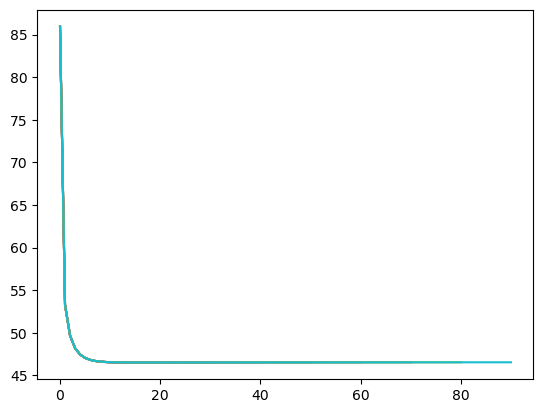

In [30]:
LEARNING_RATE = 0.5
NUM_EPOCHS = 100
cost = []
for epoch in range(NUM_EPOCHS):
    tot_loss = 0
    
    for i, s in enumerate(x_train):
        inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))
        # print(inp.shape)

        hlayer_logits = np.dot(inp, weights_ih) + bias_ih
        # print("hlayer_logits",hlayer_logits)
        hlayer_output = sigmoid(hlayer_logits)
        # print("hlayer_output",s, hlayer_output)

        final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
        # print("final_logits",final_logits, '\n')
        final_output = sigmoid(final_logits)


        tot_loss += abs(final_output[0] - y[i])

        output_delta = (y[i] - final_output[0]) * final_output * (1 - final_output[0])
        bias_ho += LEARNING_RATE * output_delta
        # bias_ih += LEARNING_RATE * (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

        weights_ho += LEARNING_RATE * hlayer_output.T.dot(output_delta)
        # weights_ih += LEARNING_RATE * inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
    cost.append(tot_loss[0])
    print(f'Epoch {epoch} : loss {tot_loss}')
    if epoch%10 == 0:
        plt.plot([pl for pl in range(epoch+1)], cost)
        plt.savefig('train.png')

# With Batches(Final)

In [15]:
np.random.seed(28)
LEARNING_RATE = 1e-3
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1

# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ih = np.load('weights/weights_ih2.npy')
weights_ho = np.random.rand(hidden_layer_size, output_size)
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ih = np.load('weights/bias_ih2.npy')
bias_ho = np.random.rand(1, output_size)

In [16]:
min_loss = 500

In [17]:
# weights_ih = np.load('weights_ih2.npy')
# weights_ho = np.load('weights_ho2.npy')
# bias_ih = np.load('bias_ih2.npy')
# bias_ho = np.load('bias_ho2.npy')
# weights_ih = weights_ih[:, [1, 3]]
# bias_ih = bias_ih[:, [1, 3]]
# weights_ho = weights_ho[[1, 3]]

Epoch 0 : loss [115.13603612]
Epoch 1 : loss [66.51944244]
Epoch 2 : loss [60.08567418]
Epoch 3 : loss [57.13474675]
Epoch 4 : loss [55.50307404]
Epoch 5 : loss [54.54859544]
Epoch 6 : loss [54.00382805]
Epoch 7 : loss [53.73566043]
Epoch 8 : loss [53.67019108]
Epoch 9 : loss [53.76337493]
Epoch 10 : loss [53.98776948]
Epoch 11 : loss [54.32589949]
Epoch 12 : loss [54.76666915]
Epoch 13 : loss [55.30330331]
Epoch 14 : loss [55.93210829]
Epoch 15 : loss [56.65169264]
Epoch 16 : loss [57.4624507]
Epoch 17 : loss [58.36618944]
Epoch 18 : loss [59.36581545]
Epoch 19 : loss [60.46501204]
Epoch 20 : loss [61.66783544]
Epoch 21 : loss [62.97814858]
Epoch 22 : loss [64.3987952]
Epoch 23 : loss [65.93040444]
Epoch 24 : loss [67.56972103]
Epoch 25 : loss [69.30740598]
Epoch 26 : loss [71.12538446]
Epoch 27 : loss [72.99406781]
Epoch 28 : loss [74.87014042]
Epoch 29 : loss [76.69596968]
Epoch 30 : loss [78.40181449]
Epoch 31 : loss [79.91155777]
Epoch 32 : loss [81.15155848]
Epoch 33 : loss [82.0

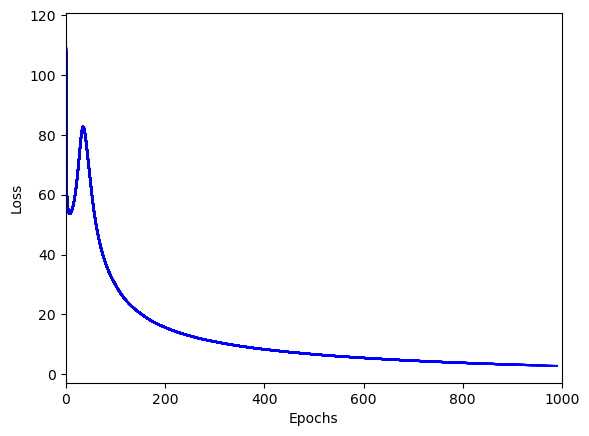

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming input_size, x, y, weights_ih, weights_ho, bias_ih, bias_ho, and sigmoid function are defined somewhere

LEARNING_RATE = 1
NUM_EPOCHS = 1000
BATCH_SIZE = 4  # Set your desired batch size
cost = []
initial_lr = LEARNING_RATE
lr_schedule = lambda epoch: initial_lr * 1.15 ** (epoch // 50)

for epoch in range(NUM_EPOCHS):
    tot_loss = 0
    
    current_lr = lr_schedule(epoch)

    for batch_start in range(0, len(x_train), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = x_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        batch_gradients_ih = np.zeros_like(weights_ih)
        batch_gradients_ho = np.zeros_like(weights_ho)
        batch_bias_ih = np.zeros_like(bias_ih)
        batch_bias_ho = np.zeros_like(bias_ho)

        for i, s in enumerate(x_batch):
            inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

            hlayer_logits = np.dot(inp, weights_ih) + bias_ih
            hlayer_output = sigmoid(hlayer_logits)

            final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
            final_output = sigmoid(final_logits)

            tot_loss += abs(final_output[0] - y_batch[i])

            output_delta = (y_batch[i] - final_output[0]) * final_output * (1 - final_output[0])
            batch_bias_ho += output_delta
            batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
            batch_gradients_ho += hlayer_output.T.dot(output_delta)
            batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

        # Update weights and biases after the batch
        bias_ho += current_lr * (batch_bias_ho / BATCH_SIZE)
        bias_ih += current_lr * (batch_bias_ih / BATCH_SIZE)
        weights_ho += current_lr * (batch_gradients_ho / BATCH_SIZE)
        weights_ih += current_lr * (batch_gradients_ih / BATCH_SIZE)

    cost.append(tot_loss)
    print(f'Epoch {epoch} : loss {tot_loss}')
    if epoch % 10 == 0:
        plt.plot([pl for pl in range(epoch + 1)], cost, 'b')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        # plt.ylim(0, 5)
        plt.xlim(0, NUM_EPOCHS)
        plt.savefig('train.png')
        # if tot_loss < min_loss:       # IMP: Don't save weights
        #     np.save('weights_ih2.npy', weights_ih)
        #     np.save('weights_ho2.npy', weights_ho)
        #     np.save('bias_ih2', bias_ih)
        #     np.save("bias_ho2", bias_ho)
        #     min_loss = tot_loss


# Testing

In [20]:
print(bias_ho, bias_ih)

[[-36.32898164]] [[1.42919837 1.41105113]]


In [21]:
x_test1 = '1100110011'
x_test2 = '1100110010'
def test(x):
    inp = np.reshape(np.array([int(char) for char in x]), (1, input_size))
    print('-'*25, '\nInput: \n', inp)
    print('\nLogit 1: \n', np.dot(inp, weights_ih)+ bias_ih)
    print('\nHidden layer 1 Output: \n', sigmoid(np.dot(inp, weights_ih)+ bias_ih))
    print('\nLogit 2: \n', np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)
    print('\nHidded layer 2 Output: \n', sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho))
    return sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)

print(test(x_test1))
print(test(x_test2))

------------------------- 
Input: 
 [[1 1 0 0 1 1 0 0 1 1]]

Logit 1: 
 [[1.5548482  1.56274481]]

Hidden layer 1 Output: 
 [[0.82561286 0.82674686]]

Logit 2: 
 [[3.33825599]]

Hidded layer 2 Output: 
 [[0.96571815]]
[[0.96571815]]
------------------------- 
Input: 
 [[1 1 0 0 1 1 0 0 1 0]]

Logit 1: 
 [[-12.18510083  14.5847765 ]]

Hidden layer 1 Output: 
 [[5.10594028e-06 9.99999537e-01]]

Logit 2: 
 [[-11.98735332]]

Hidded layer 2 Output: 
 [[6.22237092e-06]]
[[6.22237092e-06]]


In [22]:
# np.save('weights_ih2.npy', weights_ih)
# np.save('weights_ho.npy', weights_ho)
# np.save('bias_ih2', bias_ih)
# np.save("bias_ho", bias_ho)
# weights_ih = np.load('weights_ih2.npy')
# weights_ho = np.load('weights_ho2.npy')
# bias_ih = np.load('bias_ih2.npy')
# bias_ho = np.load('bias_ho2.npy')
weights_ih

array([[-13.64451992,  13.10791043],
       [-31.28386241,  29.83290423],
       [  7.81569815,  -7.43273003],
       [-15.61822693,  14.95223693],
       [-11.66058964,  11.17985818],
       [ 11.70231234, -11.11225394],
       [ 15.6725756 , -14.89920306],
       [ -7.75956284,   7.47994736],
       [ 31.27236043, -29.83469353],
       [ 13.73994903, -13.02203169]])

## New Testing

In [23]:
# x_test1 = '1100110011'
# x_test2 = '0011111011'
# def test(x):
#     inp = np.reshape(np.array([int(char) for char in x]), (1, input_size))
#     print('-'*25, '\nInput: \n', inp)
#     print('\nLogit 1: \n', np.dot(inp, weights_ih[:, [1, 3]])+ bias_ih[:, [1, 3]])
#     print('\nHidden layer 1 Output: \n', sigmoid(np.dot(inp, weights_ih[:, [1, 3]])+ bias_ih[:, [1, 3]]))
#     print('\nLogit 2: \n', np.dot(sigmoid(np.dot(inp, weights_ih[:, [1, 3]])+ bias_ih[:, [1, 3]]), weights_ho[[1, 3]])+bias_ho)
#     print('\nHidded layer 2 Output: \n', sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih[:, [1, 3]])+ bias_ih[:, [1, 3]]), weights_ho[[1, 3]])+bias_ho))
#     return sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih[:, [1, 3]])+ bias_ih[:, [1, 3]]), weights_ho[[1, 3]])+bias_ho)

# test(x_test1)
# test(x_test2)

In [24]:
count=0
for i in range(len(x_test)):
    y_p = 1 if test(x_test[i])>0.5 else 0
    if y_test[i]!=y_p:
        count+=1
        print(x[i])
print('Accuracy: ', (len(x_test) - count)/len(x_test))

------------------------- 
Input: 
 [[0 0 0 1 0 1 1 0 1 0]]

Logit 1: 
 [[ 44.45821981 -39.48286247]]

Hidden layer 1 Output: 
 [[1.00000000e+00 7.12542381e-18]]

Logit 2: 
 [[-12.65812533]]

Hidded layer 2 Output: 
 [[3.1815931e-06]]
------------------------- 
Input: 
 [[1 0 0 0 1 0 0 0 1 0]]

Logit 1: 
 [[ 7.39644924 -4.13587378]]

Hidden layer 1 Output: 
 [[0.99938695 0.01573707]]

Logit 2: 
 [[-12.28957251]]

Hidded layer 2 Output: 
 [[4.5994349e-06]]
------------------------- 
Input: 
 [[0 1 0 0 1 0 1 0 1 1]]

Logit 1: 
 [[ 19.16963139 -15.33211474]]

Hidden layer 1 Output: 
 [[9.99999995e-01 2.19455808e-07]]

Logit 2: 
 [[-12.6581201]]

Hidded layer 2 Output: 
 [[3.18160974e-06]]
------------------------- 
Input: 
 [[1 1 1 0 1 0 1 1 0 0]]

Logit 1: 
 [[-39.43106268  40.67973825]]

Hidden layer 1 Output: 
 [[7.50424599e-18 1.00000000e+00]]

Logit 2: 
 [[-11.98746291]]

Hidded layer 2 Output: 
 [[6.2216891e-06]]
------------------------- 
Input: 
 [[1 0 0 1 1 1 1 0 0 1]]

Logit 1: 

## K-Fold Cross Validation

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def relu(x):
    return np.maximum(0, x)

In [26]:
x = []
palindromes = []
for i in range(1024):
    binary_string = format(i, '010b')
    x.append(binary_string)
    if binary_string == binary_string[::-1]:
        palindromes.append(binary_string)
x = np.array(x)
palindromes = np.array(palindromes)

y = []
for binary_string in x:
    y.append(binary_string == binary_string[::-1])
y = np.array(y)
permutation_index = np.random.permutation(len(x))
x = x[permutation_index]
y = y[permutation_index]

In [27]:
np.random.seed(28)
LEARNING_RATE = 0.1
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1
global weights_ih

# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ih = np.load('weights/weights_ih2.npy')
weights_ho = np.random.rand(hidden_layer_size, output_size)
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ih = np.load('weights/bias_ih2.npy')
bias_ho = np.random.rand(1, output_size)

In [28]:
def accuracy_metric(predicted, target):
    if len(target)!=len(predicted):
        raise ValueError("Both predicted and target vectors should be same size!")

    correct = 0
    for i in range(len(target)):
        if target[i] == predicted[i]:
            correct += 1
    return correct / float(len(target)) * 100.0

In [29]:
def train(x_train,y_train, x_val, y_val, lr=1, epochs=1000, batch_size=4):
    global weights_ih, weights_ho, bias_ih, bias_ho
    LEARNING_RATE = lr
    NUM_EPOCHS = epochs
    BATCH_SIZE = batch_size  # Set your desired batch size
    cost = []
    cost_val = []
    initial_lr = LEARNING_RATE
    lr_schedule = lambda epoch: initial_lr * 0.95 ** (epoch // 50)

    for epoch in range(NUM_EPOCHS):
        tot_loss = 0
        tot_loss_valid = 0
        current_lr = lr_schedule(epoch)

        for batch_start in range(0, len(x_train), BATCH_SIZE):
            batch_end = batch_start + BATCH_SIZE
            x_batch = x_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]

            batch_gradients_ih = np.zeros_like(weights_ih)
            batch_gradients_ho = np.zeros_like(weights_ho)
            batch_bias_ih = np.zeros_like(bias_ih)
            batch_bias_ho = np.zeros_like(bias_ho)

            for i, s in enumerate(x_batch):
                inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

                hlayer_logits = np.dot(inp, weights_ih) + bias_ih
                hlayer_output = sigmoid(hlayer_logits)

                final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
                final_output = sigmoid(final_logits)

                tot_loss += abs(final_output[0] - y_batch[i])

                output_delta = (y_batch[i] - final_output[0]) * final_output * (1 - final_output[0])
                batch_bias_ho += output_delta
                batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
                batch_gradients_ho += hlayer_output.T.dot(output_delta)
                batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

            # Update weights and biases after the batch
            bias_ho += current_lr * (batch_bias_ho / BATCH_SIZE)
            bias_ih += current_lr * (batch_bias_ih / BATCH_SIZE)
            weights_ho += current_lr * (batch_gradients_ho / BATCH_SIZE)
            weights_ih += current_lr * (batch_gradients_ih / BATCH_SIZE)
        
        cost.append(tot_loss)
        # print(f'Epoch {epoch} : loss {tot_loss}')
        for i, s in enumerate(x_val):
                inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

                hlayer_logits = np.dot(inp, weights_ih) + bias_ih
                hlayer_output = sigmoid(hlayer_logits)

                final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
                final_output = sigmoid(final_logits)

                tot_loss_valid += abs(final_output[0] - y_val[i])
    cost_val.append(tot_loss_valid)
    print("Done!")
    return cost, cost_val

In [30]:
def k_fold_cross_validation(X:np.ndarray, y:np.ndarray, k_folds:int = 4, epochs_per_fold:int = 250):
        fold_size = len(X) // k_folds
        losses = []
        losses_val = []
        for i in range(k_folds):
            start, end = i * fold_size, (i + 1) * fold_size
            X_test_fold, y_test_fold = X[start:end], y[start:end]
            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])
            print(f"Training Fold {i+1}\n")
            loss_train, loss_val = train(X_train_fold, y_train_fold, X_test_fold, y_test_fold, epochs=epochs_per_fold)
            losses.extend(loss_train)
            losses_val.extend(loss_val)
            print("\n"+10*"----"+"\n")

        return losses, losses_val

In [31]:
losses, loss_val = k_fold_cross_validation(x, y, epochs_per_fold = 100)

Training Fold 1

Done!

----------------------------------------

Training Fold 2

Done!

----------------------------------------

Training Fold 3

Done!

----------------------------------------

Training Fold 4

Done!

----------------------------------------



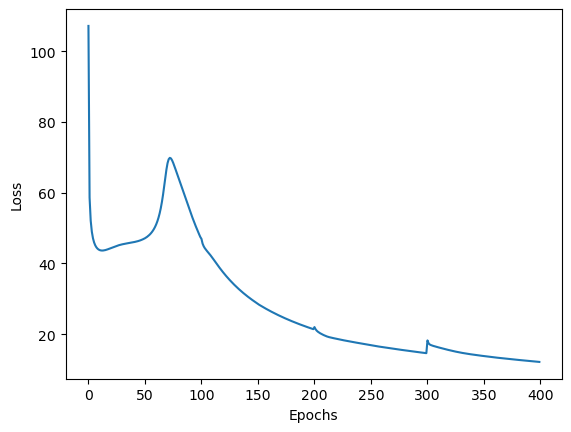

In [32]:
plt.plot( np.arange(0, len(losses)),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

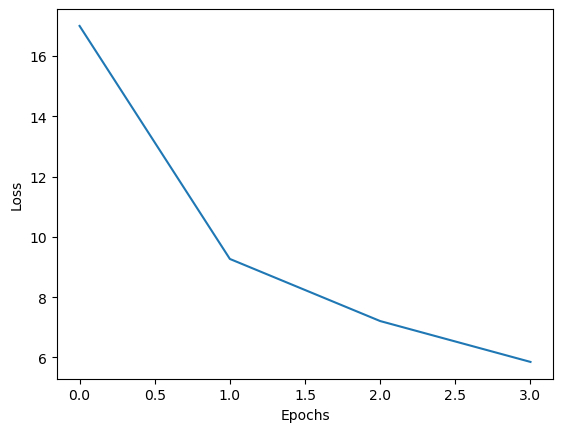

In [33]:
plt.plot( np.arange(0, len(loss_val)),loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [34]:
def predict(x):
    inp = np.reshape(np.array([int(char) for char in x]), (1, input_size))
    return sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)

In [35]:
count=0
for i in range(len(x)):
    y_p = 1 if predict(x[i])>0.5 else 0
    if y[i]!=y_p:
        count+=1
        print(x[i], ' - predicted: ', y_p)
print('Accuracy: ', (len(x) - count)/len(x))

0101010111  - predicted:  1
0001010101  - predicted:  1
0100011101  - predicted:  1
Accuracy:  0.9970703125
